# Predicting Bike Rentals
Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

Hadi Fanaee-T at the University of Porto compiled this data into a CSV file - the file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. You can download the data from the University of California, Irvine's website - http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


Here are the descriptions for the relevant columns:

    instant - A unique sequential ID number for each row
    dteday - The date of the rentals
    season - The season in which the rentals occurred
    yr - The year the rentals occurred
    mnth - The month the rentals occurred
    hr - The hour the rentals occurred
    holiday - Whether or not the day was a holiday
    weekday - The day of the week (as a number, 0 to 7)
    workingday - Whether or not the day was a working day
    weathersit - The weather (as a categorical variable)
    temp - The temperature, on a 0-1 scale
    atemp - The adjusted temperature
    hum - The humidity, on a 0-1 scale
    windspeed - The wind speed, on a 0-1 scale
    casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
    registered - The number of registered riders (people who had already signed up)
    cnt - The total number of bike rentals (casual + registered)

In this project, we'll try to predict the total number of bikes people rented in a given hour. We'll predict the cnt column using all of the other columns, except for casual and registered. We'll also create a few different machine learning models and evaluate their performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [2]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


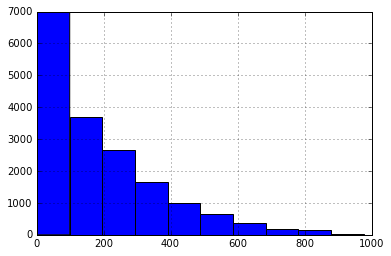

In [3]:
bike_rentals["cnt"].hist()

(array([ 6972.,  3705.,  2659.,  1660.,   987.,   663.,   369.,   188.,
          139.,    37.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

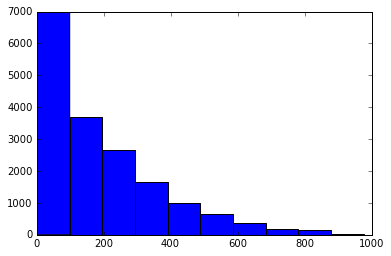

In [4]:
plt.hist(bike_rentals["cnt"])

In [5]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [6]:
def assign_label(hour):
    if (hour >= 0) and (hour < 6):
        return 4
    elif (hour >= 6) and (hour < 12):
        return 1
    elif (hour >= 12 ) and (hour < 18):
        return 2
    elif (hour >= 18) and (hour <= 24):
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [7]:
bike_rentals

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


In [8]:
train = bike_rentals.sample(frac=.8)

In [9]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [10]:
from sklearn.linear_model import LinearRegression

features = list(bike_rentals.columns)
features.remove("cnt")
features.remove("casual")
features.remove("registered")
features.remove("dteday")

lr = LinearRegression()
lr.fit(train[features], train["cnt"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
predictions = lr.predict(test[features])

In [12]:
mse = mean_squared_error(test["cnt"], predictions)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

17502.8278959
132.298253563


In [13]:
test["cnt"]

1         40
2         32
5          1
10        36
17        67
21        34
34        70
37        59
40        65
50         3
51        30
56        51
59        77
64       110
66        52
71         1
81        97
92         6
98        88
100      115
102       46
104       71
109      169
111       89
114       19
120       36
124       45
133      112
136       52
152       72
        ... 
17242     26
17246     10
17258     10
17261      2
17264     11
17266     90
17269     75
17272    118
17273    119
17280     63
17282     26
17290    112
17304     92
17305     62
17309     19
17311      3
17313      7
17316     49
17319     48
17328     60
17338     13
17339     33
17347    133
17348    123
17351     72
17352     47
17354     49
17365    120
17367    224
17375     89
Name: cnt, dtype: int64

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts.Larger errors are penalized more with MSE, which leads to a higher total error.

In [14]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(min_samples_leaf=5)

dt_reg.fit(train[features], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [15]:
predictions = dt_reg.predict(test[features])

In [16]:
mse = mean_squared_error(test["cnt"], predictions)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

2649.97534246
51.4779112092


In [17]:
dt_reg = DecisionTreeRegressor(min_samples_leaf=2)

dt_reg.fit(train[features], train["cnt"])

predictions = dt_reg.predict(test[features])

mse = mean_squared_error(test["cnt"], predictions)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

2777.8406214
52.7052238531


# Decision tree error
May be becasue Decision Tree can detect nonliner relationship between features and the predicting target, the decision tree regressor appears to have much higher accuracy than linear regression.

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(min_samples_leaf=5)

rf_reg.fit(train[features], train["cnt"])
predictions = rf_reg.predict(test[features])
mse = mean_squared_error(test["cnt"], predictions)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

1906.31133944
43.661325443


# Random forest error
By removing possible overfitting in Decision Tree, the random forest accuracy is improved over the decision tree accuracy.